### Starting with EDA and Modelling
On this notebook we will start with EDA and then go in to the modelling using the CSV provided by GA

On the previous notebook we did the scraping and were unsuccessful in getting the number of required jobs.


In [1]:
# Importing Libraries
# Base
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Text Cleaning
import re
import string
# NLP and auxiliary
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
# Models
from sklearn.naive_bayes import MultinomialNB

In [2]:
original = pd.read_csv('.\ga_csv\data_science.csv')
original.head()

,title,job_teaser,advertiser,work_type,classification,location,job_description,estimated_salary,above_ave_salary
0,Big Data Engineer - Machine Learning,Are you ready to use machine learning in one o...,Morgan McKinley,Full Time,Science & Technology,Sydney,Due to fantastic growth this organisation are ...,55000,0
1,SSIS/Data Engineer,Randstad has partnered with an industry leadin...,Randstad Technologies,Full Time,Information & Communication Technology,Melbourne,Randstad has partnered with an industry leadin...,55000,0
2,Data Warehouse Engineer - Analytics,"A great opportunity to build and have impact, ...",Robert Walters,Full Time,Information & Communication Technology,Sydney,We are currently hiring for a newly created po...,55000,0
3,PhD Scholarship ARC Training Centre in Surface...,Swinburne’s ARC Training Centre will be the fi...,Swinburne University of Technology,Full Time,Education & Training,Melbourne,About the CentreSwinburne’s ARC Training Centr...,55000,0
4,Vacation Student - Discovery,"Evolution Mining is a leading, growth focused ...",Evolution Mining,Full Time,"Mining, Resources & Energy",Wagga Wagga & Riverina,"Evolution Mining is a leading, growth focused ...",55000,0


In [3]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             1380 non-null   object
 1   job_teaser        1380 non-null   object
 2   advertiser        1380 non-null   object
 3   work_type         1380 non-null   object
 4   classification    1380 non-null   object
 5   location          1380 non-null   object
 6   job_description   1380 non-null   object
 7   estimated_salary  1380 non-null   int64 
 8   above_ave_salary  1380 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 97.2+ KB


In [4]:
original.job_description[2]

'We are currently hiring for a newly created position focussed on data warehouse engineering and analytics.This role will sit within our growing data team, and will be critical to setting up a commercially focussed analytics function.You will have the opportunity to leverage cutting edge tools, such as Snowflake and DBT, to challenge current approaches to data warehousing.This role will be pivotal to the business as we expand into new markets   ResponsibilitiesDesigning and implementing star schema data models in our existing data warehouseDesigning reports and dashboards that ensure end users’ reporting needs are metMentoring and guiding less experienced data engineers in the craft of data warehousing (analytical data engineering)Prioritising based on commercial outcomes while managing stakeholders on the same priorities EssentialsAdvanced understanding of SQLStrong data model design skills, and fluency with Kimball data modelling methodologyExperienced data warehousing practitionerTo

It is really clean already. I'll just do the basic cleaning over the job description and see what needs to be done to dummify the other columns

In [5]:
original.classification.value_counts()

Information & Communication Technology    557
Science & Technology                      151
Healthcare & Medical                      133
Education & Training                      116
Mining, Resources & Energy                 55
Engineering                                49
Banking & Financial Services               47
Marketing & Communications                 42
Consulting & Strategy                      42
Sales                                      24
Government & Defence                       22
Manufacturing, Transport & Logistics       21
Community Services & Development           18
Farming, Animals & Conservation            16
Accounting                                 14
Insurance & Superannuation                 12
Construction                               12
Human Resources & Recruitment              12
Administration & Office Support             9
Call Centre & Customer Service              7
CEO & General Management                    6
Design & Architecture             

distribution of the target: 
 0    57.463768
1    42.536232
Name: above_ave_salary, dtype: float64


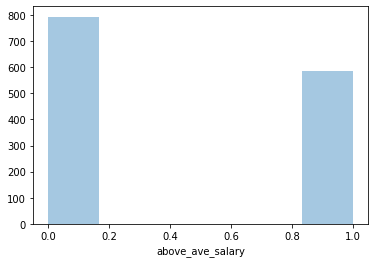

In [6]:
print('distribution of the target: \n',original.above_ave_salary.value_counts(normalize=True)*100)
sns.distplot(original.above_ave_salary, kde=False)

In [7]:
# No relevant information on work_type column
original.work_type.value_counts()

Full Time    1380
Name: work_type, dtype: int64

In [8]:
original.advertiser.value_counts()

Department of Education & Training Victoria      25
Private Advertiser                               22
Bluefin Resources Pty Limited                    16
The Australian National University               13
Monash University                                13
                                                 ..
Sanitarium                                        1
CBRE                                              1
Sharp & Carter Technology, Projects & Digital     1
Consent2Go                                        1
Cubane Consulting Pty Ltd                         1
Name: advertiser, Length: 764, dtype: int64

---
#### Cleaning the job descriptions

In [9]:
# I am going to clean the description using the same functons as before.

In [10]:
def first_clean_description(text):
    # removing email addresses
    text = re.sub('([a-zA-Z0-9._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)' , '',text)
    # Turnign all text to lowercase
    text = text.lower()
    # removing puntuation from text
    text = re.sub('[%s]' %re.escape(string.punctuation), '',text)
    # removing numbers that are in the middle of the text
    text = re.sub('\w*\d\w*', '', text)
    # taking out special caracters
    text = re.sub('\n', '', text)
    # taking out special caracters
    text = re.sub('\xa0', '', text)
    # taking out special caracters
    text = re.sub("'", '', text)
    
    # returnng the text clean
    return text

In [11]:
original.job_description = original.job_description.apply(lambda x: first_clean_description(x))

In [12]:
original.job_description[2]

'we are currently hiring for a newly created position focussed on data warehouse engineering and analyticsthis role will sit within our growing data team and will be critical to setting up a commercially focussed analytics functionyou will have the opportunity to leverage cutting edge tools such as snowflake and dbt to challenge current approaches to data warehousingthis role will be pivotal to the business as we expand into new markets   responsibilitiesdesigning and implementing star schema data models in our existing data warehousedesigning reports and dashboards that ensure end users’ reporting needs are metmentoring and guiding less experienced data engineers in the craft of data warehousing analytical data engineeringprioritising based on commercial outcomes while managing stakeholders on the same priorities essentialsadvanced understanding of sqlstrong data model design skills and fluency with kimball data modelling methodologyexperienced data warehousing practitionerto apply pl

---
#### Now for some EDA
On this section we will understand the descriptions, get the words most used and that describe the target best.

We will also get the best tokenizer to work with.

In [13]:
# Preparing Vectorizer object
vect = CountVectorizer(stop_words='english')
# applying to description
words = vect.fit_transform(original.job_description)
# making a word matrix
words = pd.DataFrame(words.todense(), columns=vect.get_feature_names(), index=original.title)
words.head()

,aaa,aad,aahl,aai,aaiabout,aam,aami,aarnet,aaron,aas,...,zoho,zolghadri,zone,zonecomplimentary,zones,zonesutilise,zoning,zookeeper,zookeeperhandson,zoology
title,,,,,,,,,,,,,,,,,,,,,
Big Data Engineer - Machine Learning,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SSIS/Data Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Data Warehouse Engineer - Analytics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PhD Scholarship ARC Training Centre in Surface Engineering for Advanced Material,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vacation Student - Discovery,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
words.shape

(1380, 23039)

In [15]:
# most frequnet words in all documents words
words.sum().sort_values(ascending = False).head(20)

data           5967
experience     4543
work           3140
team           2979
role           2706
business       2604
skills         2554
management     2064
development    2057
working        2038
support        1858
research       1834
including      1589
ability        1519
science        1484
apply          1408
opportunity    1313
knowledge      1270
position       1239
new            1234
dtype: int64

In [16]:
# least frequnet words in all documents words
words.sum().sort_values().head(20)

leavepurchased    1
frills            1
fringing          1
ran               1
fronted           1
ramsar            1
ramp              1
ramirez           1
frs               1
frtb              1
fruitful          1
fruity            1
frustrated        1
fsds              1
fsqms             1
ftc               1
ftk               1
raj               1
fueled            1
fuelefficient     1
dtype: int64

Gotta use stopwords

In [17]:
# Transposing word matrix to get jobs as columns
wordst = words.transpose()

# Tried doing this to look at most used words per job, but there are several jobs that have the same title.
# Junior analys, Data Analyst etc.
top_words = {}
for c in list(wordst.columns):
#     print(c)
    top = wordst.sort_values(str(c),ascending=False).head(30)[str(c)]
    top_words = list(zip(top.index,top.values))
    
top_words

ValueError: The column label 'Laboratory Assistant' is not unique.

Having 23k columns on DF is probably not going to help us. I will use a function to get the best score on a model and try to get more meaning to distinguish the classes.

In [18]:
# split the new DataFrame into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(original.job_description, original.above_ave_salary, random_state=1)

In [19]:
# making function to test the tokenization made.
def tokenizing_test_multinomial(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [20]:
vect = CountVectorizer(stop_words='english',  max_df=.25, min_df=2, ngram_range=(1,2))
tokenizing_test_multinomial(vect)

Features:  45905
Accuracy:  0.7391304347826086


In [21]:
# Lets see how we go against the baseline on this first pass
score = cross_val_score(MultinomialNB(),vect.fit_transform(original.job_description)
                        , original.above_ave_salary,cv=5)
print(score)
print(np.mean(score))
print(np.std(score))
print('baseline',(original.above_ave_salary.value_counts(normalize=True).max()*100))

[0.81884058 0.74637681 0.69927536 0.61956522 0.64855072]
0.7065217391304348
0.07096271404258024
baseline 57.463768115942024


---
Woof.. That variance, hey!? Dimensionality reduction before the end (probably PCA).

That was interesting and fun, but lets keep moving. One interesting thing on the trial and error process we went through above was to see that bigrams are helping the score a lot but also increasing the dimensionality and, therefore, the variance of the model.

That worries me only as to how far as dimensionality reduction will be able to carry us. Will have to test PCA and maybe RFECV(don't really want to, will take too long).

PCA will be less interpretable at the end. I will try to get the probability of high/low with the MultinomialNB and then go for the reduction, this way even if we are unable to interpret the result after PCA we can get some significance of what are the most important words.

Next step will be to see what words are more related to high paying jobs and which are to low.

In [22]:
# Vectorizing the text
words = vect.fit_transform(original.job_description)
# making it become a DF
words = pd.DataFrame(words.todense(), columns=vect.get_feature_names())
# split the new DataFrame into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(words, original.above_ave_salary, random_state=1)

In [23]:
mnb = MultinomialNB().fit(X_train,y_train)

low_prob = np.exp(mnb.feature_log_prob_[0])
high_prob = np.exp(mnb.feature_log_prob_[1])
words = pd.DataFrame({'high':high_prob, 'low':low_prob, 'feature':words.columns.values})

In [24]:
words.shape

(60786, 3)

In [25]:
words.sort_values('high', ascending=False).head(20)

,high,low,feature
41414,0.001302,0.000919,product
5605,0.001063,0.000313,big
8827,0.001033,0.000443,cloud
6275,0.000988,0.000684,building
13305,0.000988,0.000360,data science
30149,0.000948,0.000457,lead
27820,0.000928,0.000526,insights
5610,0.000923,0.000184,big data
12953,0.000903,0.000339,data analytics
31998,0.000898,0.000324,machine


In [26]:
words.sort_values('low', ascending=False).head(20)

,high,low,feature
47953,0.000244,0.001646,school
51547,0.000464,0.001617,staff
24649,0.000594,0.001571,health
52691,0.000165,0.001275,students
41841,0.000529,0.001246,program
57386,0.000569,0.001207,university
14315,0.000459,0.001171,demonstrated
17119,0.000474,0.001109,education
9831,0.000329,0.001059,community
41991,0.000484,0.000973,programs


If we are to just answer the question of high/low pay with the job description the DF above helps a lot.

We can probably get more concise and significant results if we dig deeper.

Let us see what happends to this df when we try to reduce the amount of features we are getting directly from the CountVectorizer.

In [27]:
# making function to test the tokenization made.
def tokenizing_test_multinomial2(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [28]:
# split the new DataFrame into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(original.job_description, original.above_ave_salary, random_state=1)
# Using the vectorizer
vect = CountVectorizer(stop_words='english',  max_df=.9, min_df=10, ngram_range=(1,2))
tokenizing_test_multinomial2(vect)

Features:  4941
Accuracy:  0.6927536231884058


In [29]:
# Lets see how we go against the baseline on this first pass
score = cross_val_score(MultinomialNB(),vect.fit_transform(original.job_description)
                        , original.above_ave_salary,cv=5)
print(score)
print(np.mean(score))
print(np.std(score))
print('baseline',(original.above_ave_salary.value_counts(normalize=True).max()*100))

[0.77173913 0.73913043 0.69202899 0.61231884 0.62681159]
0.6884057971014492
0.06182820002232328
baseline 57.463768115942024


In [30]:
# Vectorizing the text
words = vect.fit_transform(original.job_description)
# making it become a DF
words = pd.DataFrame(words.todense(), columns=vect.get_feature_names())

mnb = MultinomialNB().fit(words.values,original.above_ave_salary)

low_prob = np.exp(mnb.feature_log_prob_[0])
high_prob = np.exp(mnb.feature_log_prob_[1])
word = pd.DataFrame({'high':high_prob, 'low':low_prob, 'feature':words.columns.values})

In [31]:
vect.vocabulary_

{'fantastic': 2460,
 'growth': 2741,
 'organisation': 4118,
 'looking': 3560,
 'big': 662,
 'engineering': 2107,
 'lead': 3371,
 'help': 2814,
 'high': 2835,
 'performing': 4269,
 'team': 6058,
 'working': 6680,
 'collaborative': 1056,
 'expected': 2309,
 'innovative': 3114,
 'inquisitive': 3120,
 'mindset': 3807,
 'solving': 5621,
 'problems': 4521,
 'amazing': 257,
 'office': 4018,
 'environment': 2170,
 'creative': 1399,
 'fun': 2603,
 'inclusive': 3023,
 'truly': 6312,
 'happy': 2771,
 'work': 6622,
 'really': 4830,
 'believes': 639,
 'senior': 5410,
 'specialists': 5665,
 'end': 2087,
 'implementation': 2962,
 'projects': 4607,
 'having': 2782,
 'advantageous': 177,
 'ideal': 2929,
 'candidate': 807,
 'impact': 2950,
 'modelling': 3827,
 'warehouse': 6544,
 'passion': 4207,
 'new': 3924,
 'aws': 580,
 'azure': 585,
 'highly': 2856,
 'python': 4717,
 'sql': 5693,
 'linux': 3511,
 'essential': 2215,
 'warehousing': 6546,
 'communication': 1133,
 'mentoring': 3774,
 'preparation': 44

In [32]:
word.shape

(6776, 3)

In [33]:
word.sort_values('high', ascending=False).head(20)

,high,low,feature
739,0.008757,0.004710,business
6058,0.007791,0.006828,team
5159,0.006825,0.006366,role
6622,0.006751,0.008142,work
3633,0.005539,0.004642,management
5510,0.005188,0.006820,skills
6680,0.005176,0.004773,working
1774,0.005053,0.004929,development
296,0.004369,0.001461,analytics
5317,0.003908,0.003388,science


In [34]:
word.sort_values('low', ascending=False).head(20)

,high,low,feature
6622,0.006751,0.008142,work
6058,0.007791,0.006828,team
5510,0.005188,0.006820,skills
5159,0.006825,0.006366,role
5020,0.002979,0.005383,research
5943,0.003286,0.005279,support
1774,0.005053,0.004929,development
6680,0.005176,0.004773,working
739,0.008757,0.004710,business
3633,0.005539,0.004642,management


What I got from playing with the size of the BOW:
- From 60786 words to 6776
- Accuracy scores from 70.65% to 68,84%
- variance range from 19.92 percentual points to 15.94 percentual points

From the results we would infer that there is little accuracy/variance to be gained by further reducing the features with CountVectorizer.

We are likely to get better accuracy with other features (classification , location). Therefore, we should not worry to much about the accuracy at the moment.

From looking at the words, there is some intuition to the fact that lemmatizing may be detrimental. Technical words may be cut and mixed in ways that cannot be clearly measured. Not to mention that similar words should appear with high significance regardless.

Let's look at TF-IDF next. The intuition is that it would work better than the CountVectorizer in this specific case (because of the "frequency" part), but we won't know for sure until we try it.

In [35]:
# DataFrame into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(original.job_description, original.above_ave_salary, random_state=1)

In [36]:
# making function to test the TF-IDF made.
def TFIDF_test_multinomial(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print('Features: ', X_train_dtm.shape[1])
    score = cross_val_score(MultinomialNB(),X_train_dtm, y_train,cv=5)
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    print('-'*15)
    print(score)
    print(np.mean(score))
    print(np.std(score))
    print('baseline',(original.above_ave_salary.value_counts(normalize=True).max()*100))

In [37]:
vect = TfidfVectorizer(stop_words='english',max_df=0.8, min_df=10, ngram_range=(1,2))
TFIDF_test_multinomial(vect)

Features:  4938
Accuracy:  0.7246376811594203
---------------
[0.69565217 0.71980676 0.78743961 0.71014493 0.74396135]
0.731400966183575
0.032131959706890624
baseline 57.463768115942024


This first pass with TF-IDF got us to:
- Features: 6774
- Accuracy: 73.14%
- variance range of: 9.18 Percentage points

This is much better than the CountVectorizer as far as variance goes(std is about half). Accuracy is marginally better.

Good enough! Lets move on with the first part of the project.

In [38]:
# Vectorizing the text
words = vect.fit_transform(original.job_description)
# making it become a DF
words = pd.DataFrame(words.todense(), columns=vect.get_feature_names())

mnb = MultinomialNB().fit(words.values,original.above_ave_salary)

low_prob = np.exp(mnb.feature_log_prob_[0])
high_prob = np.exp(mnb.feature_log_prob_[1])
word = pd.DataFrame({'high':high_prob, 'low':low_prob, 'feature':words.columns.values})

In [39]:
word.shape

(6774, 3)

In [40]:
word.sort_values('high', ascending=False).head(20)

,high,low,feature
739,0.002154,0.001457,business
296,0.001667,0.000719,analytics
3633,0.001384,0.001369,management
6620,0.001367,0.001860,work
1774,0.001241,0.001397,development
6678,0.001231,0.001288,working
5600,0.001174,0.000825,solutions
5509,0.001153,0.001694,skills
6108,0.000995,0.000994,technical
1707,0.000957,0.000801,design


In [41]:
word.sort_values('low', ascending=False).head(20)

,high,low,feature
5020,0.000888,0.002113,research
6620,0.001367,0.001860,work
5509,0.001153,0.001694,skills
739,0.002154,0.001457,business
1774,0.001241,0.001397,development
5942,0.000829,0.001386,support
3633,0.001384,0.001369,management
6678,0.001231,0.001288,working
4385,0.000568,0.001226,position
1,0.000877,0.001209,ability


This was a nice experiment, now I think it will be a good idea to go through a pipeline with all the data and check the relative feature importance of all data, getting the scores, accuracy etc.

This is the last step of the first part of the project. We will test a few different models and land on the final inferences and answers.

The final inferences will use eli5 as well and we will compare the results.

Comparing this to the methodology used above will be interesting as well.

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
import eli5

C:\Users\julio\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\julio\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [43]:
# Making the objects
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_jobs=-1)
svc = SVC()
lrcv = LogisticRegressionCV(n_jobs=-1)
pca = PCA(n_components=100) #this will be used later
# Best vectorizer found for the text before
vect = TfidfVectorizer(stop_words='english',max_df=0.8, min_df=10, ngram_range=(1,2))



Getting a full DF with the dummied columns to fit the pipelines

In [98]:
dummies = pd.get_dummies(data=original, columns=['classification','location']).drop(['job_description','above_ave_salary',
                                                                                      'estimated_salary','work_type','advertiser',
                                                                                      'job_teaser','title'], axis=1)

vect = TfidfVectorizer(stop_words='english',max_df=0.8, min_df=10, ngram_range=(1,1))

words = vect.fit_transform(original.job_description)

matrix = pd.DataFrame(data=words.todense(), columns=vect.get_feature_names())

In [99]:
# Data_Frame with Dumies and frequency of words joined
X = dummies.join(matrix)

# X.to_csv('joined_df.csv',index=False)

In [68]:
# Preparing the splits
X_train, X_test, y_train, y_test = train_test_split(X, original.above_ave_salary, random_state=1)

In [47]:
X_train.shape

(1035, 6851)

In [48]:
# Function to run and score the models
def model_testing(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    scores = metrics.classification_report(y_test, y_pred)
    print(scores)
    print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

In [49]:
# Testing MultinomialNB
model_testing(mnb) 

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       200
           1       0.67      0.65      0.66       145

    accuracy                           0.72       345
   macro avg       0.71      0.71      0.71       345
weighted avg       0.71      0.72      0.72       345

Accuracy: 0.7159420289855073


In [50]:
# Testing the Random Forest Classifier
model_testing(rfc) 
eli5.show_weights(rfc, 
                  feature_names=list(X.columns), top=60,
                  target_names=original.above_ave_salary)

              precision    recall  f1-score   support

           0       0.76      0.83      0.80       200
           1       0.74      0.64      0.69       145

    accuracy                           0.75       345
   macro avg       0.75      0.74      0.74       345
weighted avg       0.75      0.75      0.75       345

Accuracy: 0.7536231884057971


Weight,Feature
0.0060 ± 0.0270,position
0.0060 ± 0.0231,skills
0.0055 ± 0.0235,data science
0.0054 ± 0.0238,business
0.0053 ± 0.0322,classification_Information & Communication Technology
0.0051 ± 0.0233,architecture
0.0044 ± 0.0208,letter
0.0040 ± 0.0244,analytics
0.0037 ± 0.0202,machine learning
0.0036 ± 0.0216,qualifications


In [51]:
# Testing the Support Vector Machine Classifier
model_testing(svc) 

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       200
           1       0.69      0.65      0.67       145

    accuracy                           0.73       345
   macro avg       0.72      0.72      0.72       345
weighted avg       0.73      0.73      0.73       345

Accuracy: 0.7304347826086957


In [52]:
# Testing the LogisticRegressionCV
model_testing(lrcv) 
eli5.show_weights(lrcv, 
                  feature_names=list(X.columns), top=60,
                  target_names=original.above_ave_salary)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       200
           1       0.75      0.74      0.74       145

    accuracy                           0.79       345
   macro avg       0.78      0.78      0.78       345
weighted avg       0.79      0.79      0.79       345

Accuracy: 0.7855072463768116


Weight?,Feature
+4.671,senior
+4.186,leadership
+4.074,lead
+3.998,analytics
+3.542,leading
+3.299,emerging
+3.252,enterprise
+3.163,contribute
+3.101,expertise
+3.046,bioinformatics


This was fun!

I would finish the analysis here and present my findings. We will get very little from PCA as far as getting more information out.

I will run a pipeline with LogisticRegressionCV and PCA below, just to get the the score up and probably get better predictions.

In [55]:
# preparing the PCA object
pca = PCA()

In [89]:
# Making a pipeline to speed up the process with vanila pca
pipeline = make_pipeline(pca, lrcv)
# Testing it on a model
model_testing(pipeline) 

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       200
           1       0.73      0.68      0.70       145

    accuracy                           0.76       345
   macro avg       0.75      0.75      0.75       345
weighted avg       0.76      0.76      0.76       345

Accuracy: 0.7565217391304347


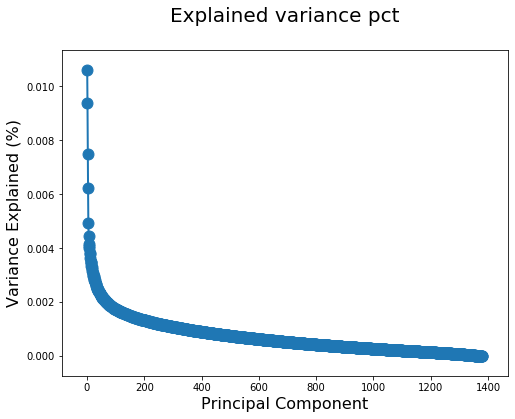

In [100]:
Xs = StandardScaler().fit_transform(X)
pca.fit(Xs)
exp_var = pca.explained_variance_ratio_

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, len(exp_var)+1)), exp_var, lw=2)
ax.scatter(list(range(1, len(exp_var)+1)), exp_var, s=120)
ax.set_title('Explained variance pct\n', fontsize=20)
ax.set_xlabel('Principal Component', fontsize=16)
ax.set_ylabel('Variance Explained (%)', fontsize=16)
plt.show()

In [95]:
# Getting the Principal Components in a DF to be used in the model
job_pcs = pca.transform(Xs)
job_pcs = pd.DataFrame(job_pcs, 
                       columns=['PC'+str(i) for i in range(1,list(X.index)[-1]+2)],
                       )
job_pcs['target'] = original['above_ave_salary']
# job_pcs.head()
job_pcs.shape

(1380, 1380)

In [96]:
# Getting the number of compnents I want to use in the model
pcs = ['PC'+str(i) for i in range(1,201)]
job = job_pcs[pcs]
job.shape

(1380, 200)

In [83]:
# Preparing the splits
X_train, X_test, y_train, y_test = train_test_split(job, original.above_ave_salary, random_state=1)

# fitting the LRCV model smf getting the predictions
lrcv.fit(X_train,y_train)
y_pred_lrcv = lrcv.predict(X_test)
# scoring and printing
scores_lrcv = metrics.classification_report(y_test, y_pred_lrcv)
print('Report for Logistic Regression:\n',scores_lrcv)
print('Accuracy for Logistic Regression:',metrics.accuracy_score(y_test, y_pred_lrcv))
print('\n----'*2)
# fitting the RFC model smf getting the predictions
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
# scoring and printing
scores_rfc = metrics.classification_report(y_test, y_pred_rfc)
print('Report for Random Forest:\n',scores_rfc)
print('Accuracy for Random Forest:',metrics.accuracy_score(y_test, y_pred_rfc))

Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80       200
           1       0.73      0.68      0.70       145

    accuracy                           0.76       345
   macro avg       0.75      0.75      0.75       345
weighted avg       0.76      0.76      0.76       345

Accuracy for Logistic Regression: 0.7565217391304347

----
----
Report for Random Forest:
               precision    recall  f1-score   support

           0       0.75      0.82      0.79       200
           1       0.72      0.62      0.67       145

    accuracy                           0.74       345
   macro avg       0.73      0.72      0.73       345
weighted avg       0.74      0.74      0.74       345

Accuracy for Random Forest: 0.7391304347826086


#### This is actually an interesting result.

It would be expected that Random Forest would outperform Logistic Regression after PCA, but it did not.

---
Looking at what PCA tells us about the features

In [101]:
print(pd.Series(pca.components_[0], index=X.columns).sort_values(ascending=False).head(20))
print(' -'*15)
print(pd.Series(pca.components_[0], index=X.columns).sort_values(ascending=False).tail(20))

students                                                                         0.104691
classification_Education & Training                                              0.102022
det                                                                              0.096852
httpwwweducationvicgovauaboutprogramshealthprotectpageschildsafestandardsaspx    0.095855
school                                                                           0.095275
upholding                                                                        0.095146
impartiality                                                                     0.095146
httpwwweducationvicgovauhrwebworkmpagespublicsectorvaluesaspx                    0.095146
responsiveness                                                                   0.095146
staff                                                                            0.094937
expects                                                                          0.088445
schools   

In [102]:
print(pd.Series(pca.components_[1], index=X.columns).sort_values(ascending=False).head(20))
print(' -'*15)
print(pd.Series(pca.components_[1], index=X.columns).sort_values(ascending=False).tail(20))

boldness            0.159061
ethispheres         0.159061
spades              0.159061
modesty             0.159061
wwwcapgeminicom     0.158474
industryspecific    0.158474
conviction          0.158474
capgemini           0.157839
capgeminis          0.156291
ace                 0.154734
entitled            0.152946
count               0.140313
eur                 0.138510
ambitions           0.137095
lets                0.134398
realize             0.132623
legally             0.131889
happens             0.130806
continuance         0.129641
honesty             0.127012
dtype: float64
 - - - - - - - - - - - - - - -
similar           -0.012986
analysis          -0.013035
growing           -0.013171
sql               -0.013286
degree            -0.013687
product           -0.014273
management        -0.014290
years             -0.014343
internal          -0.014659
market            -0.014689
products          -0.014705
discussion        -0.014756
commercial        -0.014762
verbal    

In [103]:

print(pd.Series(pca.components_[2], index=X.columns).sort_values(ascending=False).head(20))
print(' -'*15)
print(pd.Series(pca.components_[2], index=X.columns).sort_values(ascending=False).tail(20))

det                                                                              0.127567
httpwwweducationvicgovauaboutprogramshealthprotectpageschildsafestandardsaspx    0.126960
responsiveness                                                                   0.126871
upholding                                                                        0.126871
impartiality                                                                     0.126871
httpwwweducationvicgovauhrwebworkmpagespublicsectorvaluesaspx                    0.126871
successor                                                                        0.117063
clause                                                                           0.117063
expects                                                                          0.115608
directingorganising                                                              0.109187
judgements                                                                       0.109187
reform    

In [94]:
exp_var = pca10.explained_variance_ratio_
exp_var

NameError: name 'pca10' is not defined

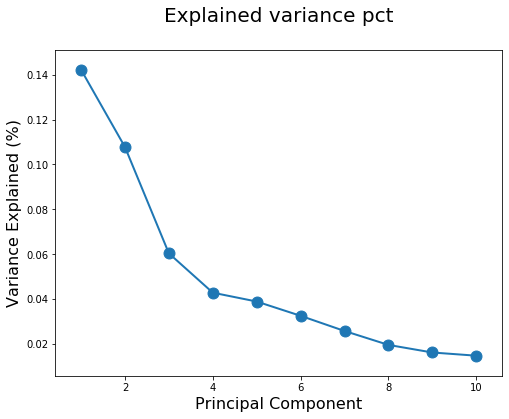

In [59]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, len(exp_var)+1)), exp_var, lw=2)
ax.scatter(list(range(1, len(exp_var)+1)), exp_var, s=120)
ax.set_title('Explained variance pct\n', fontsize=20)
ax.set_xlabel('Principal Component', fontsize=16)
ax.set_ylabel('Variance Explained (%)', fontsize=16)
plt.show()

PCA is telling us that the features have greater variance, and explain the target , in the following order:

1. Location 
2. Skills
3. Classification (industry)



---
### Time for the second part of the project

In part 2 we will try to do 2 things:
1. What differenciates jobs with "Data" on the title from jobs that do not have it.
2. Does the sentiment and subjectivity of a description help in determine the different classes - This can be applied to the two above.

Methodology will be:
1. Getting a baseline model and words out
2. Improving tokenizer
3. imporving/selecting model
4. getting words and making inferences


Let's jump in.

In [163]:
# Taking a look at the target rows
original.loc[(original.title.str.contains('Data')) | 
             (original.title.str.contains('data'))]

,title,job_teaser,advertiser,work_type,classification,location,job_description,estimated_salary,above_ave_salary
0,Big Data Engineer - Machine Learning,Are you ready to use machine learning in one o...,Morgan McKinley,Full Time,Science & Technology,Sydney,due to fantastic growth this organisation are ...,55000,0
1,SSIS/Data Engineer,Randstad has partnered with an industry leadin...,Randstad Technologies,Full Time,Information & Communication Technology,Melbourne,randstad has partnered with an industry leadin...,55000,0
2,Data Warehouse Engineer - Analytics,"A great opportunity to build and have impact, ...",Robert Walters,Full Time,Information & Communication Technology,Sydney,we are currently hiring for a newly created po...,55000,0
11,Start your new career as a Data Analyst,Start your career as a consultant data analyst...,The Data School Pty Ltd,Full Time,Information & Communication Technology,Sydney,data is exploding the demand for great data an...,55000,0
17,Environmental Data Reporting,Overview: Benchmark Monitoring is seeking a pe...,Benchmark Monitoring,Full Time,Science & Technology,"Newcastle, Maitland & Hunter",the position is located at the benchmark monit...,55000,0
...,...,...,...,...,...,...,...,...,...
1264,Data Architect,"You will be part of the technology, engineerin...",Coles,Full Time,Information & Communication Technology,Melbourne,about us the digital team is focused on reinv...,155000,1
1268,Data Modeler,Join a leading brand as Data Modeler is to dri...,White Bay Search,Full Time,Information & Communication Technology,Sydney,data modeler the role of data modeler is to...,155000,1
1270,Data Governance Manager,Establish and manage a greenfield data governa...,Attribute Group,Full Time,Information & Communication Technology,Sydney,data governance manager – sydney data gove...,155000,1
1272,Data Governance Manager,Are you looking for your next opportunity with...,FIRESOFT People,Full Time,Information & Communication Technology,Sydney,data governance managerare you looking for you...,155000,1


In [168]:
# making the target column and DF to be used on question 2
q_two = original[['title','job_description']]
q_two['data_jobs'] = 0
q_two.loc[(q_two.title.str.contains('Data')) | 
             (q_two.title.str.contains('data')), 'data_jobs'] = 1

C:\Users\julio\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\julio\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [169]:
# Looks good
q_two.head()

,title,job_description,data_jobs
0,Big Data Engineer - Machine Learning,due to fantastic growth this organisation are ...,1
1,SSIS/Data Engineer,randstad has partnered with an industry leadin...,1
2,Data Warehouse Engineer - Analytics,we are currently hiring for a newly created po...,1
3,PhD Scholarship ARC Training Centre in Surface...,about the centreswinburne’s arc training centr...,0
4,Vacation Student - Discovery,evolution mining is a leading growth focused a...,0


Really quick, lets get the Sentiment analysis of the job postings before going ahead


In [173]:
from textblob import TextBlob

In [179]:
# Getting the subjectivity
q_two['subjectivity'] = [round(TextBlob(word).sentiment.subjectivity, 2) 
                      for word in q_two['job_description']]
# Getting the polarity
q_two['polarity'] = [round(TextBlob(word).sentiment.polarity, 2) 
                      for word in q_two['job_description']]
q_two.head()

C:\Users\julio\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\julio\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,job_description,data_jobs,subjectivity,polarity
0,Big Data Engineer - Machine Learning,due to fantastic growth this organisation are ...,1,0.46,0.16
1,SSIS/Data Engineer,randstad has partnered with an industry leadin...,1,0.37,0.17
2,Data Warehouse Engineer - Analytics,we are currently hiring for a newly created po...,1,0.45,0.06
3,PhD Scholarship ARC Training Centre in Surface...,about the centreswinburne’s arc training centr...,0,0.48,0.16
4,Vacation Student - Discovery,evolution mining is a leading growth focused a...,0,0.47,0.23


### 1 - Getting a Baseline model

In [274]:
# Dividing the target and the features
X = q_two['job_description']
y = q_two['data_jobs']
# Preparing the splits
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [183]:


# Making a baseline pipeline
vect = CountVectorizer()
lgcv = LogisticRegressionCV()
pipe = make_pipeline(vect, lgcv)

# Testing the baseline pipeline
model_testing(pipe) 



C:\Users\julio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\julio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       255
           1       0.90      0.60      0.72        90

    accuracy                           0.88       345
   macro avg       0.89      0.79      0.82       345
weighted avg       0.88      0.88      0.87       345

Accuracy: 0.8782608695652174


AttributeError: 'Series' object has no attribute 'columns'

In [185]:
eli5.show_weights(pipe, vec=vec,
                  feature_names=X_test, top=60,
                  target_names=y)

Weight?,Feature
+0.361,data
+0.082,learning
+0.077,machine
+0.077,sql
+0.070,python
+0.067,database
+0.065,spark
+0.063,proficiency
+0.063,insights
+0.062,big


Really good score for a baseline model. The words that are comming out are a bit out tough.

### 2 - Improving tokenizer

Let's do stopwords, bigrams and set a minimum frequency between 2-10. That should give us a more meaningful set of words.

TF-IDF will probably not be a good idea for this question. The frequency is only a part of the problem and TF-IDF will place too much enphasis on that.



In [195]:



# making function to test the tokenizer
def vect_test_multinomial(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print('Features: ', X_train_dtm.shape[1])
    score = cross_val_score(MultinomialNB(),X_train_dtm, y_train,cv=5)
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    print('-'*15)
    print(score)
    print(np.mean(score))
    print(np.std(score))
    print('baseline',(y.value_counts(normalize=True).max()*100))
    

In [201]:
# testing vectorizer
vect = CountVectorizer(stop_words='english',ngram_range=(1,2), min_df=2)
vect_test_multinomial(vect)

Features:  46017
Accuracy:  0.8753623188405797
---------------
[0.84057971 0.82125604 0.85990338 0.82608696 0.80676329]
0.8309178743961352
0.01807563954963257
baseline 74.71014492753623


In [202]:
eli5.show_weights(MultinomialNB(), vec=vect,
                  feature_names=X_test, top=60,
                  target_names=y)

Looking good! let's move on!

### 3 - imporving/selecting model

We will use Logistic Regression CV, and Random Forest Classifier.

First thing will be to get a GridSearchCV on the models and try to get the best hiperparameters for the model.

In [203]:
from sklearn.model_selection import GridSearchCV

In [318]:
# Preparing best tokenizer
vect = CountVectorizer(stop_words='english',ngram_range=(1,2), min_df=2)
# getting test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# fitting the tokenizer
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [319]:


# preapring the model
lrcv = LogisticRegressionCV()
param_grid = {   
    'Cs':[.001,.01,.1,1,10],
    'cv':[5],
    'penalty':['l1','l2'],
    'solver':[ 'newton-cg','lbfgs', 'liblinear'],
    'max_iter':[1000]
    }

# preparing the gridsearch
grid = GridSearchCV(lrcv, n_jobs=-1, param_grid=param_grid, verbose=1)


In [320]:
model_testing(grid)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.4min finished


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.90      0.67      0.76        90

    accuracy                           0.89       345
   macro avg       0.89      0.82      0.85       345
weighted avg       0.89      0.89      0.89       345

Accuracy: 0.8927536231884058


In [213]:
grid.best_params_

{'Cs': 10, 'cv': 5, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

In [220]:

# preapring the model
rfc = RandomForestClassifier(n_jobs=-1)
param_grid = {   
    'criterion':['gini', 'entropy'],
    'min_samples_split':[2,3,4,5],
    'max_samples':[0,.2,.4,.6,.8,.9],
    }

# preparing the gridsearch
grid = GridSearchCV(rfc, n_jobs=-1, param_grid=param_grid, verbose=1)



In [221]:
model_testing(grid)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   48.8s finished


              precision    recall  f1-score   support

           0       0.82      0.99      0.90       255
           1       0.92      0.40      0.56        90

    accuracy                           0.83       345
   macro avg       0.87      0.69      0.73       345
weighted avg       0.85      0.83      0.81       345

Accuracy: 0.8347826086956521


In [219]:
grid.best_params_

{'criterion': 'gini', 'max_samples': 0.8, 'min_samples_split': 3}

Seems resonable for a classification with two classes that LRCV would do better.

It is surprising that the ensamble would score worst than our baseline model.

Now for the final part.

### 4 - getting words and making inferences
aka. getting it all tougheder


In [275]:
# Making a  pipeline with the optimized tokenizer and LogReg
vec = CountVectorizer(stop_words='english',ngram_range=(1,2), min_df=2)
clf = LogisticRegressionCV(Cs=10,cv=5,max_iter=1000,
                                               penalty='l2',solver='liblinear')
pipe = make_pipeline(vec, clf)

# Testing the Random Forest Classifier
model_testing(pipe) 

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.90      0.67      0.76        90

    accuracy                           0.89       345
   macro avg       0.89      0.82      0.85       345
weighted avg       0.89      0.89      0.89       345

Accuracy: 0.8927536231884058


In [276]:
eli5.show_weights(pipe, vec=vec,
                  feature_names=X_test, top=60,
                  target_names=y)

Weight?,Feature
+0.457,data
+0.153,insights
+0.142,data analyst
+0.141,spark
+0.139,focus
+0.134,machine
+0.133,python
+0.132,proficiency
+0.131,database
+0.119,data engineer


In [303]:
# Taking a look at the words scoring per job description -- Just change the slice of X
eli5.show_prediction(clf, X[3], vec=vec,
                     target_names=y,
                     
                     )

Alright! made sense and looks good!

Lets just take a look at the sentiment to see if it gives us any further insight.

In [305]:
# Non data jobs 
print('Mean:',q_two.loc[q_two.data_jobs == 0].sort_values('polarity', ascending=False).mean())
print('---'*15)
print('STD:',q_two.loc[q_two.data_jobs == 1].sort_values('polarity', ascending=False).mean())

Mean: data_jobs       0.000000
subjectivity    0.463744
polarity        0.195422
dtype: float64
---------------------------------------------
STD: data_jobs       1.000000
subjectivity    0.464499
polarity        0.201948
dtype: float64


In [306]:
# data jobs 
print('Mean:',q_two.loc[q_two.data_jobs == 1].sort_values('polarity', ascending=False).mean())
print('---'*15)

print('STD:',q_two.loc[q_two.data_jobs == 1].sort_values('polarity', ascending=False).std())

Mean: data_jobs       1.000000
subjectivity    0.464499
polarity        0.201948
dtype: float64
---------------------------------------------
STD: data_jobs       0.000000
subjectivity    0.075255
polarity        0.070456
dtype: float64


In [289]:
q_two.loc[q_two.data_jobs == 1].sort_values('polarity', ascending=False)

,title,job_description,data_jobs,subjectivity,polarity
1139,Lead Data Scientist,desired skills significant comemrcial programm...,1,0.69,0.44
811,Data Scientist | Energy Generation,overviewsupporting a consulting company across...,1,0.60,0.39
900,Data Officer,the role the data officer will lead a team of ...,1,0.60,0.37
802,Data Scientist,our company tabcorp is a worldclass diversifi...,1,0.61,0.37
540,Data Engineer - Sydney,we are seeking a junior consultant who is pass...,1,0.62,0.36
...,...,...,...,...,...
134,Data Science Analyst,about the role the role data science analyst ...,1,0.41,0.05
1159,Head of Data Science,head of data scienceseeking leaders across ec...,1,0.32,0.05
906,Data Storage Specialist,our client is a rapidly growing tech start up ...,1,0.50,0.04
837,Principal Data Manager,• leading teams of data managers to define dat...,1,0.37,0.03


In [290]:
q_two.loc[q_two.data_jobs == 0].sort_values('polarity', ascending=False)

,title,job_description,data_jobs,subjectivity,polarity
590,Automation Engineer,as an automation engineer in the quality team ...,0,0.67,0.42
7,Graduate Sales Administrator,entrylevel graduate role working with an amazi...,0,0.59,0.41
1193,Business Translator - Advanced Analytics,our client is one of australia’s largest compa...,0,0.59,0.40
195,Junior Java Developer - Graduates with Compute...,what will the role look like on a day to day b...,0,0.63,0.40
283,Junior Software Developer,redi apps was redi software is a joondalup ba...,0,0.61,0.39
...,...,...,...,...,...
1215,Quantitative Developer / Modeller,responsibilitiesdevelopment of statistical mod...,0,0.40,0.02
409,Hydrocarbon Spill Advisor,about us oil spill response limited osrl is...,0,0.26,0.02
1287,"Quant Developer (Modern C++, Python and Java) ...",you will be solving complex problems that can ...,0,0.35,0.02
1376,General Practitioner | Wagga DPA | $500K+,benefitslong standing principle practitioner r...,0,0.44,0.02


Not really... But finding nothing is something on its own, right?

It was expected that the polarity would be close to 0, but I expected more variance in the subjectivity.

# Inferences on the data and findings

### Part 1 - Methodology

Data was scraped from [seek](www.seek.com.au) and processed with the intention was to determine which words/features 
are most impactful for high/low salaries in job postings specifically in the data industry.

After scraping the data was cleaned, removing punctuation, lowercasing and guaranteeing that there were no special/unwanted characters in the job description.

The target was then determined and a baseline classification model was developed to determine high and low salaries.

The tokenizer was then optimized by iterating through NLP techniques and testing on a Multinomial Naive Bayes to find the most accurate model. 
Count Vectorizer and TF-IDF were tested and TF-IDF had the best score and also gave more meaningful results for our inference.
Through the iterations the importance of the features became clearer.

A model was selected from a Random Forest Classifier, Logistic Regression CV, and a Support Vector Machine Classifier (SVC).
The model with the best score was Logistic Regression CV. 
Given that the target is binary (high or low), it is no surprise that this is the best performing model. 

Finally we used PCA to better understand the information we were getting from the features and see if we could improve the model.
We were able to dramatically reduce the dimensionality of the model using PCA. The score, however, was improved only marginally.

The summary of findings can be seen below.

#### Part 1 - Findings

The inferences below were achieved by classifying the salaries as high (above 100.000) and low (below 100.000).

Features that hold more significance for **high** Salary:
- Being Senior in your position (keyword: `senior`)
- Leadership roles and ability (keyword: `leadership, leader, managers`)
- Specialization in a particular field (keyword: `Expertise, bioinformatics, expert`)
- Working with predictions and forecasting (keyword: `Analytics, modelling `)

Skills that hold more significance for **high** Salary:
- Machine Learning
- Data Science
- Big Data
- cloud (overlaps with Big Data)

Features that hold more significance for **low** Salary:
- Work in an assistant role (keyword: `assist, support`)
- Working with Analysis (keyword: `Analyst, analysis`)
- Roles for recently graduated students (keyword: `school, student, learn, graduate`)

Skills that hold more significance for **low** Salary:
- Excel
- Data Analysis
- Data entry (likely from words such as: Excel, support, assist, internal, attention)

We can safely recommend that:
- Location has an impact on the variance of the salary
- Specific Skills that point to specialization are pointes of high salary
- Having a data job in a particular industry (
 data related or non data related) can point to high or low compensation and needs to be looked at on a case by case basis by the model.

### Part 2 - Methodology

Firstly, we prepared the target, determining data jobs as those that have the word "data" in their title.

Then a baseline model was prepared on a pipeline with a bare Count Vectorizer and Logistic Regression CV.

At this point the tokenizer was optimized, following the methodology used in question 1.

The model was chosen from Random Forest and Logistic Regression CV and optimized using Gridsearch with five folds.

The best parameters were then fitted to the initial pipeline and the final inference was made, arriving at the summary below.

#### Part 2 - Findings

Data Jobs:
- Skills specific to data jobs, such as machine learning and big data.
- The word data itself is a big factor.

Non Data Jobs: 
- Soft skills, such as communication and intelligence.
- Generic skills, such as web development and marketing

We also looked at the sentiment of the job postings and it has no impact that we were able to measure.

